In [7]:
import numpy as np
import astropy.units as u
import pandas as pd
from ReadFile import Read
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def ComponentMass(filename, p_type):
    '''
    This function calculates the total mass of a certain particle type in a galaxy .txt file
    Inputs:
        filename (.txt file): name of the file referring to a galaxy simulation
        p_type (int raging from 1 to 3): integer that refers to a particle type
    Outputs:
        TotMass (float): float containing the total mass for a given particle 
            type in units of 10^12 solar masses
    '''
    
    #Using the Read function from the previous assignment and storing data onto the 'data' variable
    data = Read(filename)[2]
    
    #Indexing the data according to the particle type
    index = np.where(data['type'] == p_type)
    
    #Creating a variable for the total mass to be stored
    TotMass = 0
    
    #For loop iterating over every row and adding up the values
    for i in data['m'][index]:
        TotMass += i*10**10*u.Msun
    
    return np.around(TotMass/(10**12*u.Msun), 3)

In [18]:
def MassDataFrame(filename_list):
    '''
    This function creates a pandas DataFrame for the galaxies in a list and with the
        the rows being the type of particles
    Input:
        filename_list (python list of strings): this variable takes in a list containing strings
            referring to .txt files containing data for galaxies
            
    Output:
        df (pandas Dataframe): This function outputs a DataFrame with the Galaxy filenames being 
            the columns and the particle types being the rows
    '''
    #Create a pandas DataFrame called df, having the appropriate columns and index being filename_list
    column_list = ['Galaxy Name' , 'Halo Mass', 'Disk Mass', 'Bulge Mass', 'Sum', 'Fraction']
    df = pd.DataFrame(columns = column_list, index = filename_list)
    
    #For loops appending values that come out of the ComponentMass function
    #into the correct position of the DataFrame
    
    #For loop appending the first three values referring to each different particle type
    for i in filename_list:
        df.loc[i] = {'Halo Mass': ComponentMass(i, 1), 
                     'Disk Mass':ComponentMass(i, 2), 
                     'Bulge Mass':ComponentMass(i, 3)}
    df.loc['M33_000.txt', 'Bulge Mass'] = 0
    
    #For loop appending values for the 'Sum' column
    for i in filename_list:
        df.loc[i, 'Sum'] = df.loc[i].sum()
    
    #For loop appending values for the 'Fraction' column
    for k in filename_list:
        df.loc[k, 'Fraction'] = np.around((df.loc[k, 'Bulge Mass']+df.loc[k, 'Disk Mass'])/(df.loc[k, 'Sum']), 3)
    df['Galaxy Name'] = ['Milky Way','M31','M33']  
    
    #Reseting the index
    df.index = [0,1,2]

    #Renaming the columns so that they have the correct
    #units
    df.columns = (['Galaxy Name' , r'Halo Mass ($10^{12} M_{\odot}$)', 
                                 r'Disk Mass ($10^{12} M_{\odot}$)', 
                                r'Bulge Mass ($10^{12} M_{\odot}$)', 
                                 r'Sum ($10^{12} M_{\odot}$)', 
                                 r'Fraction ($10^{12} M_{\odot}$)'])
    return df

In [20]:
#These last few lines will be only for exporting the DataFrame onto a PDF file
df = MassDataFrame(['MW_000.txt','M31_000.txt','M33_000.txt'])

In [21]:
df

,Galaxy Name,Halo Mass ($10^{12} M_{\odot}$),Disk Mass ($10^{12} M_{\odot}$),Bulge Mass ($10^{12} M_{\odot}$),Sum ($10^{12} M_{\odot}$),Fraction ($10^{12} M_{\odot}$)
0,Milky Way,1.975,0.075,0.01,2.06,0.041
1,M31,1.921,0.12,0.019,2.06,0.067
2,M33,0.187,0.009,0,0.196,0.046


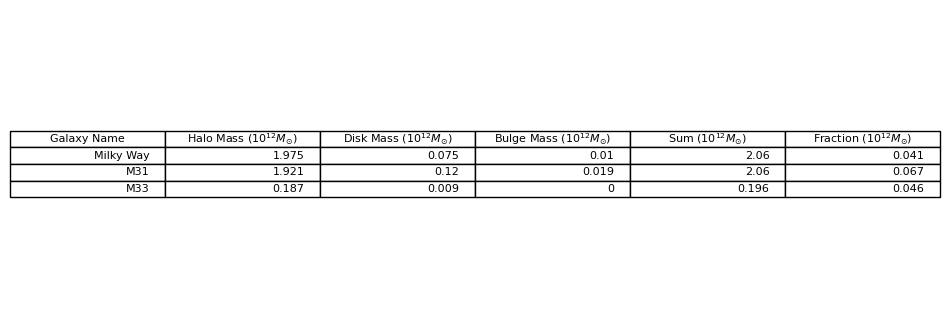

In [24]:
#Creating a matplotlib fig for the pandas DataFrame
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')

In [26]:
#Criating a PDF
pp = PdfPages("GalaxiesMasses.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()